## Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mercari_df= pd.read_csv('train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [3]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


A lot of Null values in brand_name and a few in item_description. Null values are handled in later part of this colab notebook.

### Distribution of Price

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

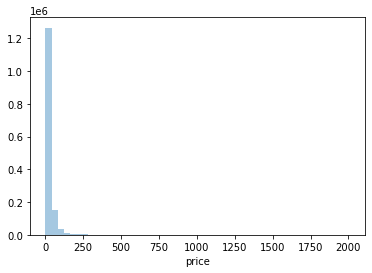

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

### Distribution of Log(Price)

<AxesSubplot:xlabel='price'>

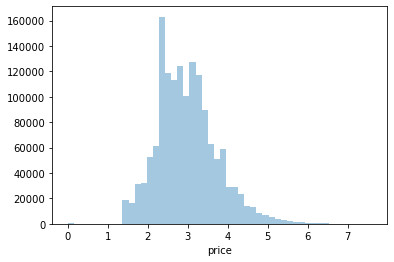

In [9]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)

Log(Price) makes it normally distributed

In [10]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [11]:
print('Shipping:\n',mercari_df['shipping'].value_counts())
print('item_condition_id:\n',mercari_df['item_condition_id'].value_counts())

Shipping:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [12]:
boolean_cond= mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

# EDA

#### Distribution of Shipping variable

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.09 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.09 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


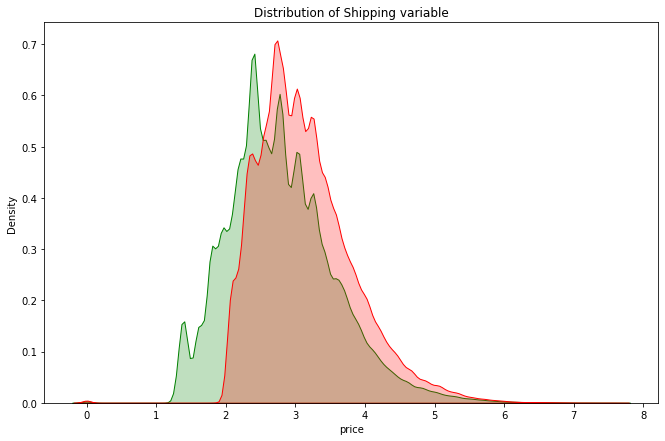

In [13]:
plt.figure(figsize=(11,7))

sns.kdeplot(mercari_df[mercari_df['shipping'] == 1].loc[:, 'price'], shade=True, color="g", bw=.09, label="Seller")

sns.kdeplot(mercari_df[mercari_df['shipping'] == 0].loc[:, 'price'], shade=True, color="r", bw=.09, label="Buyer")
plt.title("Distribution of Shipping variable")
plt.show()

## Shipping and Price Interacction

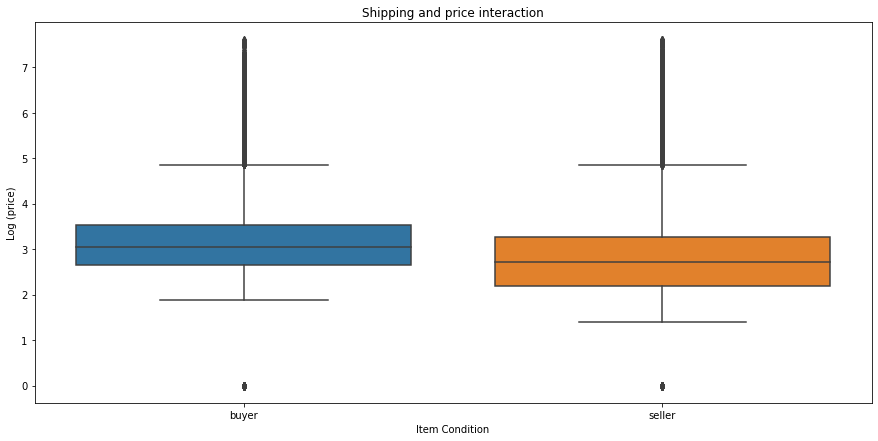

In [14]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x='shipping', y='price', data=mercari_df)
ax.set_xticklabels(["buyer", "seller"])
plt.ylabel("Log (price)")
plt.xlabel("Item Condition")

plt.title("Shipping and price interaction")
plt.show()

### Since the category name is split by '/', we create new coulmns

In [15]:
# # apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
# def split_cat(category_name):
#     try:
#         return category_name.split('/')
#     except:
#         return ['Other_Null' , 'Other_Null' , 'Other_Null']

# # 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성. 
# mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
#                         zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# # 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
# print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
# print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
# print('소분류 갯수 :', mercari_df['cat_so'].nunique())

In [16]:
'test1/test2/test3'.split('/')

['test1', 'test2', 'test3']

In [17]:
# Create split_cat() function that returns cateogires (dae, jung, so) called by "apply lambda"
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# Calls split_cat() function above and create cat_dae, cat_jung, cat_so columns in mercari_df
mercari_df['category_list'] = mercari_df['category_name'].apply(lambda x : split_cat(x))
mercari_df['category_list'].head()

0                                [Men, Tops, T-shirts]
1    [Electronics, Computers & Tablets, Components ...
2                      [Women, Tops & Blouses, Blouse]
3               [Home, Home Décor, Home Décor Accents]
4                          [Women, Jewelry, Necklaces]
Name: category_list, dtype: object

In [18]:
mercari_df['cat_dae'] = mercari_df['category_list'].apply(lambda x:x[0])
mercari_df['cat_jung'] = mercari_df['category_list'].apply(lambda x:x[1])
mercari_df['cat_so'] = mercari_df['category_list'].apply(lambda x:x[2])

mercari_df.drop('category_list', axis=1, inplace=True)

In [19]:
mercari_df[['cat_dae','cat_jung','cat_so']].head()

,cat_dae,cat_jung,cat_so
0,Men,Tops,T-shirts
1,Electronics,Computers & Tablets,Components & Parts
2,Women,Tops & Blouses,Blouse
3,Home,Home Décor,Home Décor Accents
4,Women,Jewelry,Necklaces


## Handling Null Values

As we observed in the beginning, there are lots of null values in brand_name and a few in category_name and item_description. Here, we are handling those Null values by replacing "Other_Null" values.

In [20]:
# Handling Null Values
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# Check Null values now. All columns should have 0 Null values now.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [21]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1482535 non-null  object 
 4   brand_name         1482535 non-null  object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482535 non-null  object 
 8   cat_dae            1482535 non-null  object 
 9   cat_jung           1482535 non-null  object 
 10  cat_so             1482535 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.4+ MB


### Feature Encoding & Feature Vectorization

**brand name & type**

In [22]:
print('# of unique values in brand name  :', mercari_df['brand_name'].nunique())
print('5 samples from brand name: \n', mercari_df['brand_name'].value_counts()[:5])

# of unique values in brand name  : 4810
5 samples from brand name: 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [23]:
print('# of unique values in name:', mercari_df['name'].nunique())
print('7 samples in name: \n', mercari_df['name'][:7])

# of unique values in name: 1225273
7 samples in name: 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


**Average length of item_description**

In [24]:
pd.set_option('max_colwidth', 200)

# Average length of item_description
print('Average length of item_description:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

Average length of item_description: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [25]:
import gc
gc.collect()

0

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert "name" with feature vectorization
cnt_vec = CountVectorizer(max_features=30000)
X_name = cnt_vec.fit_transform(mercari_df.name)

# Convert "item_description" with feature vectorization
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)

name vectorization shape: (1482535, 30000)
item_description vectorization shape: (1482535, 50000)


## Using LabelBinarizer to convert to one-hot-encoding, then store in spare matrix

In [27]:
from sklearn.preprocessing import LabelBinarizer

# Convert each feature (brand_name, item_condition_id, shipping) to one-hot-encoded sparse matrix 
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# Convert each feature (cat_dae, cat_jung, cat_so) to one-hot-encoded spare matrix
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [28]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [29]:
import gc
gc.collect()

0

## Merge feature-vectorized spare matrix with one-hot-encoded spare matrix by using hstack() function

In [30]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
            X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# Use hstack() to merge all the datasets that are encoded and vectorized in the previous steps.
# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합. 
X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# Data set takes too much memory, so we need to delete it after we are done using it.
# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제. 
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 85812)


0

# Modeling

**rmsle**

In [31]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    # In the original dataset, we need to convert the log1p back to its original form.
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

여러 모델에 대한 학습/예측을 수행하기 위해 별도의 함수인 model_train_predict()생성.

해당 함수는 여러 희소 행렬을 hstack()으로 결합한 뒤 학습과 테스트 데이터 세트로 분할 후 모델 학습 및 예측을 수행

Create model_train_predict() function to train on a number of different models

In [32]:
import gc 
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

## Ridge Regression

Let's see how much Item Description helps build a better model.

릿지 선형 회귀로 학습/예측/평가. Item Description 피처의 영향도를 알아보기 위한 테스트 함께 수행

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

linear_model = Ridge(solver = "lsqr", fit_intercept=False)

# RMSLE without Item Description
sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

# RMSLE with Item Description
sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.5033970623645883
Item Description을 포함한 rmsle 값: 0.4711438610635729


In [30]:
import gc
gc.collect()

0

In [31]:
## Skip for now

from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# RMSLE of LGBM
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 0.45682627184738794


In [32]:
### Skip for now

# RMSLE of ensemble of LGBM and Ridge
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45066331311726593


In [37]:
import mlflow
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge

In [38]:
def rmsle_eval(y_test, y_pred):
  return -1 * evaluate_org_price(y_test, y_pred)

In [52]:
mlflow.set_tracking_uri("file:///home/jovyan/work/jupyter/Mercari/test")
mlflow.sklearn.autolog()

In [53]:
with mlflow.start_run() as run:
    rmsle_metric = make_scorer(rmsle_eval, greater_is_better=False)
    metrics = {
        "Root mean squared log error": rmsle_metric
        ,"Explained variance": "explained_variance"
        ,"Max error": "max_error"
        ,"Negative mean absolute error": "neg_mean_absolute_error"
        ,"Negative mean squared error": "neg_mean_squared_error"
        ,"Negative root mean squared error": "neg_root_mean_squared_error"
        ,"Negative mean squared log error": "neg_mean_squared_log_error"
        ,"Negitive median absolute error": "neg_median_absolute_error"
        ,"R2": "r2"
    }
    param_grid={"alpha": [0.01, 0.1, 1]}

    linear_model = Ridge(solver = "lsqr", fit_intercept=False)

    sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                          X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
    X = hstack(sparse_matrix_list).tocsr()
    y = mercari_df['price']
    cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)
    gs = GridSearchCV(linear_model, scoring=metrics, refit="Root mean squared log error", param_grid=param_grid, cv=cv, n_jobs=4, return_train_score=True, verbose=4)
    gs.fit(X, y)
    results = gs.cv_results_
    print(results)

2021/11/19 22:27:58 WARNING mlflow.utils: Truncated the value of the key `scoring`. Truncated value: `{'Root mean squared log error': make_scorer(rmsle_eval, greater_is_better=False), 'Explained variance': 'explained_variance', 'Max error': 'max_error', 'Negative mean absolute error': 'neg_mean_absolute_error', 'Negative mean squared error': 'neg_...`


Fitting 4 folds for each of 3 candidates, totalling 12 fits


2021/11/19 22:29:34 WARNING mlflow.sklearn: Failed to infer model signature: Expected one of (pandas.DataFrame, numpy array, dictionary of (name -> numpy.ndarray), pyspark.sql.DataFrame) but got '<class 'scipy.sparse.csr.csr_matrix'>'
2021/11/19 22:29:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.9/site-packages/mlflow/sklearn/utils.py:644: UserWarning: Top 5 child runs will be created based on ordering in rank_test_Root mean squared log error column. You can choose not to limit the number of child runs created by setting `max_tuning_runs=None`."
2021/11/19 22:29:37 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


{'mean_fit_time': array([20.83737701, 20.6113382 , 19.89434493]), 'std_fit_time': array([0.55060005, 0.43711667, 0.21904162]), 'mean_score_time': array([0.43631989, 0.43954521, 0.3608734 ]), 'std_score_time': array([0.04079407, 0.01885692, 0.03207397]), 'param_alpha': masked_array(data=[0.01, 0.1, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_Root mean squared log error': array([0.47487794, 0.47478454, 0.47467758]), 'split1_test_Root mean squared log error': array([0.47539599, 0.47532797, 0.47472837]), 'split2_test_Root mean squared log error': array([0.47455373, 0.47447466, 0.47402765]), 'split3_test_Root mean squared log error': array([0.47560324, 0.4755389 , 0.47497542]), 'mean_test_Root mean squared log error': array([0.47510773, 0.47503151, 0.47460225]), 'std_test_Root mean squared log error': array([0.00041483, 0.00042321, 0.00035036]), 'rank_test_Root mean squ

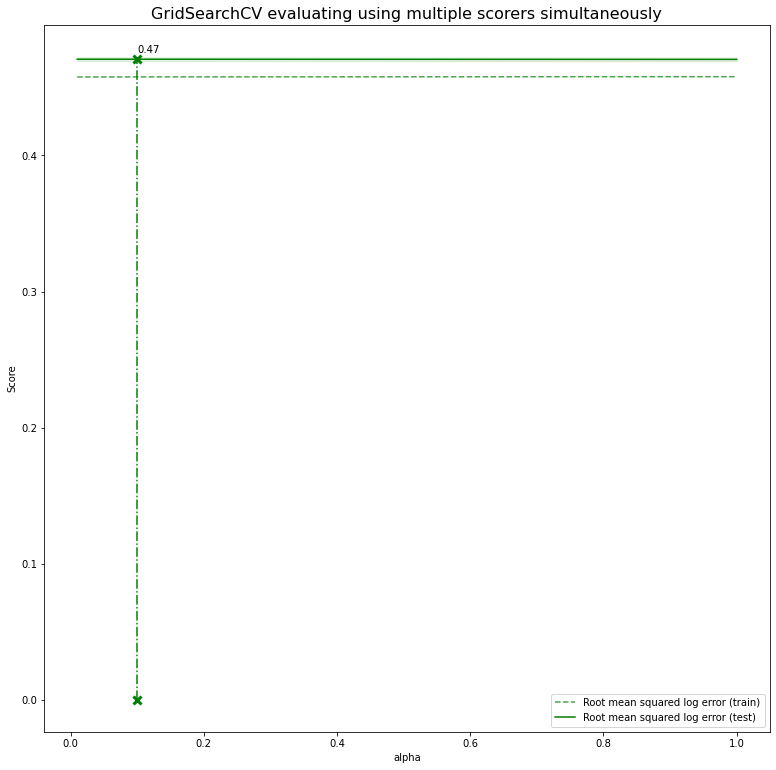

In [34]:
metrics = {
    "Root mean squared log error": rmsle_metric
    # ,"Explained variance": "explained_variance"
    # ,"Max error": "max_error"
    # ,"Negative mean absolute error": "neg_mean_absolute_error"
    # ,"Negative mean squared error": "neg_mean_squared_error"
    # ,"Negative root mean squared error": "neg_root_mean_squared_error"
    # ,"Negative mean squared log error": "neg_mean_squared_log_error"
    # ,"Negitive median absolute error": "neg_median_absolute_error"
    # ,"R2": "r2"
}



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("alpha")
plt.ylabel("Score")

ax = plt.gca()
# ax.set_xlim(0, 402)
# ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_alpha"].data, dtype=float)

for scorer, color in zip(sorted(metrics), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()